<font color="#FA8072" face="Edwardian Script ITC" size="25"> Exercice2</font>


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [43]:
test = pd.read_csv('test_scores.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("test shape : ", test.shape)
# Affichage des 10 premières lignes
test.head()

test shape :  (2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0



<u><font color="#DC143C" face="Comic sans MS" size="5">Data Exploration</font></u>


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null float64
school_type        2133 non-null float64
classroom          2133 non-null object
teaching_method    2133 non-null float64
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null float64
lunch              2133 non-null float64
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


In [45]:
# Print numerical features
num_features = test.select_dtypes(include=[np.number]).columns
print(num_features)

# Print categorical features
cat_features = test.select_dtypes(include=[np.object]).columns
print(cat_features)



Index(['school_setting', 'school_type', 'teaching_method', 'n_student',
       'gender', 'lunch', 'pretest', 'posttest'],
      dtype='object')
Index(['school', 'classroom', 'student_id'], dtype='object')


In [ ]:
test.describe()

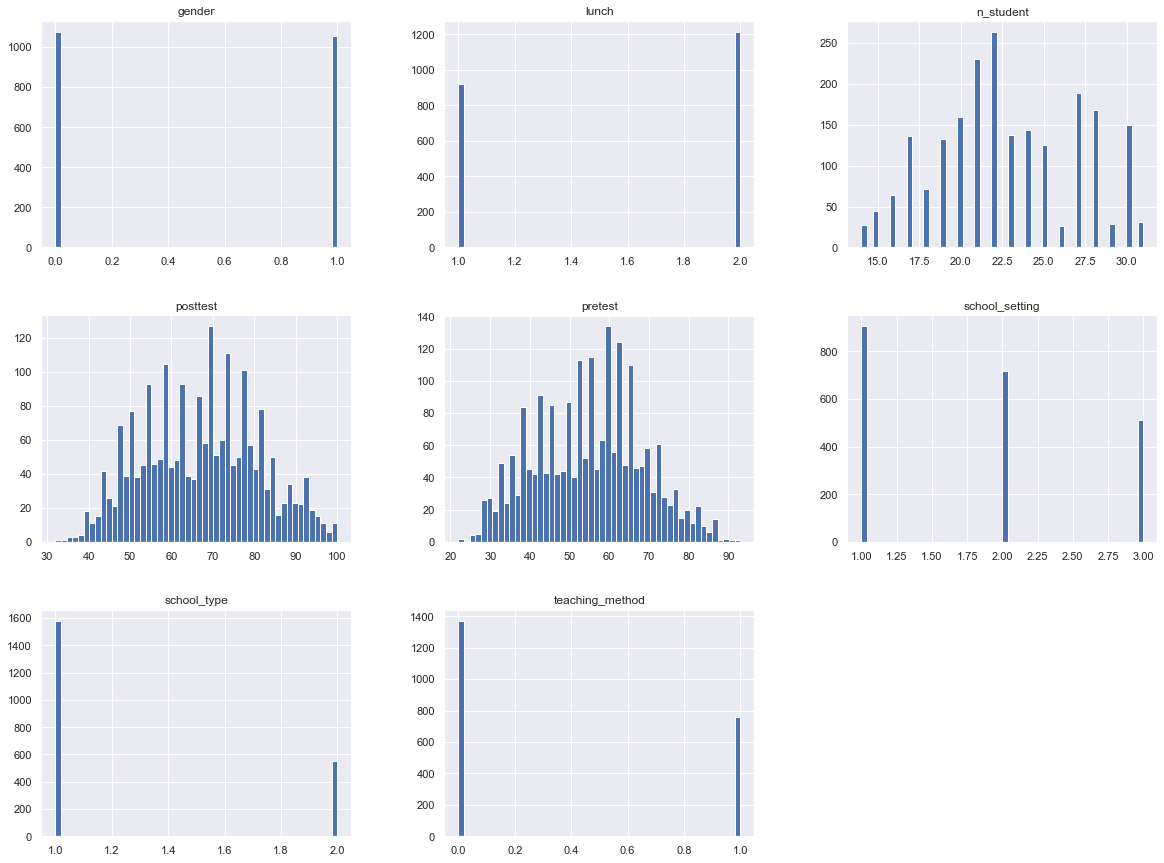

In [35]:
# Visualisation des histogrammes des variables numériques
test.hist(bins=50, figsize=(20,15))
plt.show()

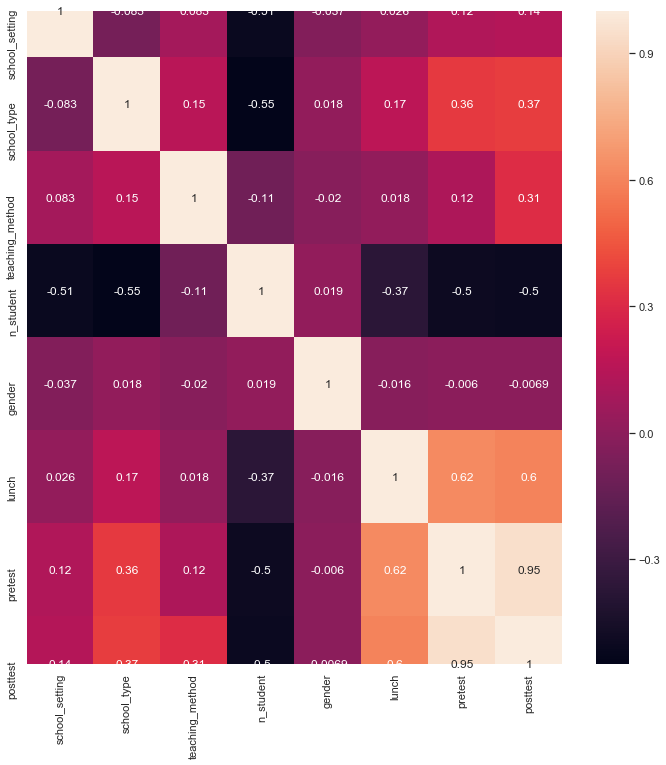

In [36]:
corr_matrix = test.corr()
sns.heatmap(corr_matrix, annot=True)

In [37]:
#Supprimer les lignes dupliquées
test = test.drop_duplicates()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null float64
school_type        2133 non-null float64
classroom          2133 non-null object
teaching_method    2133 non-null float64
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null float64
lunch              2133 non-null float64
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(8), object(3)
memory usage: 200.0+ KB


In [38]:
# Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn :
from sklearn.model_selection import train_test_split

X = test.drop(columns=["posttest","school","school_setting","school_type","classroom","teaching_method","n_student","gender","student_id","lunch"],axis=1) # input variables (X est une dataframe)
y = test["posttest"].to_numpy() # output variable (y est un vecteur)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True,random_state=43)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

print(X.shape)
print(y.shape)


X_train: (1706, 1) X_test: (427, 1)
(2133, 1)
(2133,)


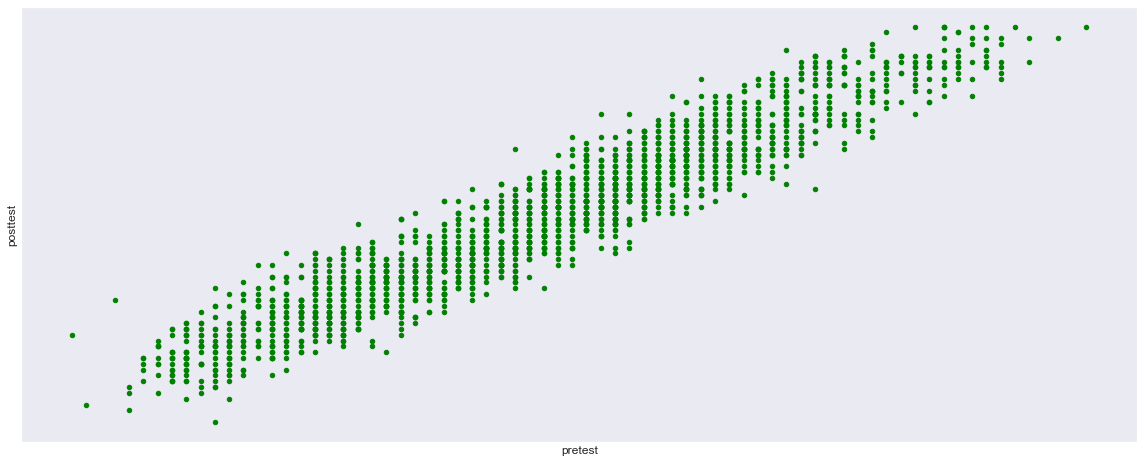

In [39]:
test.plot(kind='scatter', x='pretest', y='posttest', figsize=(20,8), alpha=0.99,color='green')
plt.xticks(())
plt.yticks(())
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
lin_reg = LinearRegression()
# Apprentissage du modèle par la méthode fit() : Il s'agit d'une approche d'apprentissage
# supervisée puisqu'on utilise lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train, y_train)

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
y_pred = lin_reg.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.9010102607995458  et RMSE= 4.351564176814211
Testing: R2= 0.9153946913194314  et RMSE= 4.236801126662341


Coefficients: 
 [0.9779512]
Mean squared error: 17.95
Coefficient of determination: 0.92


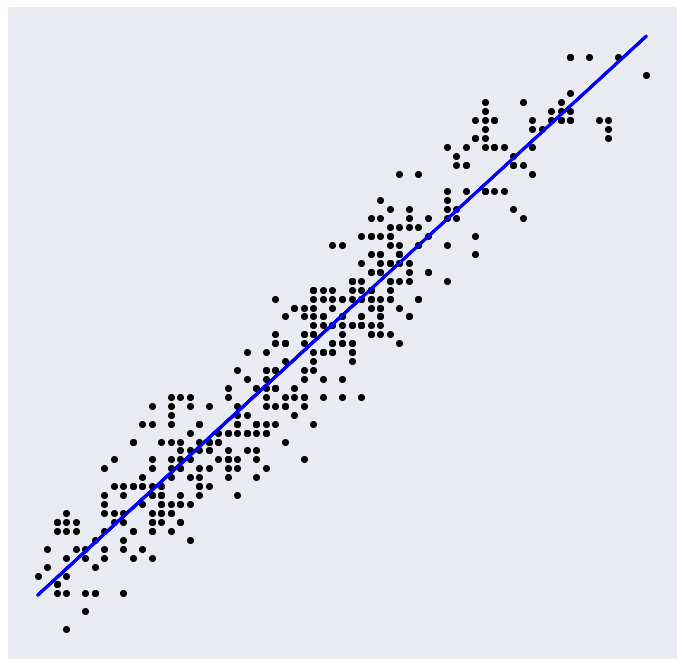

In [41]:
# The coefficients
print('Coefficients: \n', lin_reg.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


<font color="#FA8072" face="Edwardian Script ITC" size="25"> Exercice3</font>


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [14]:
data = pd.read_csv('housing.data.txt')


In [15]:
X = data.drop("MEDV",1)   #Feature Matrix
y = data["MEDV"]          #Target Variable

data.head()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CIRM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [17]:
data.describe()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


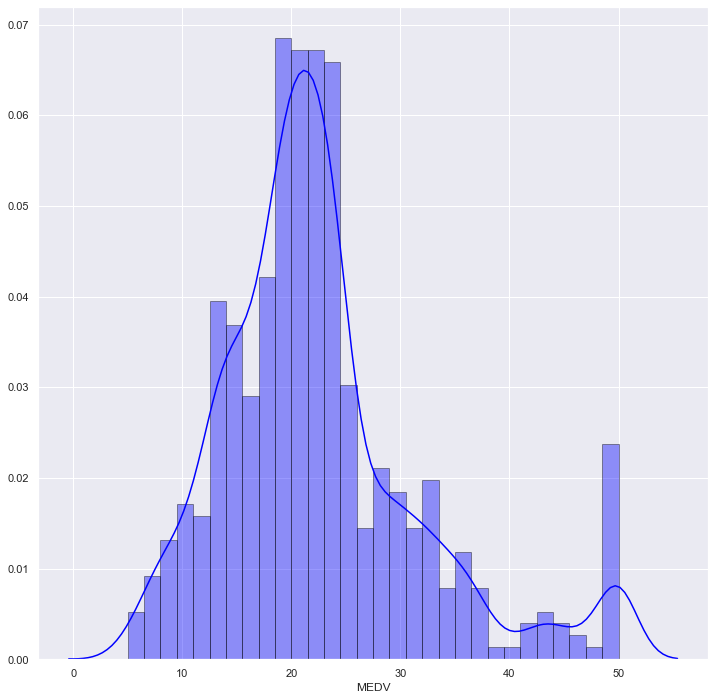

In [18]:
sns.distplot(data['MEDV'],hist_kws=dict(edgecolor="black", linewidth=1),bins=30,color='Blue')
sns.set(rc={'figure.figsize':(12,12)})

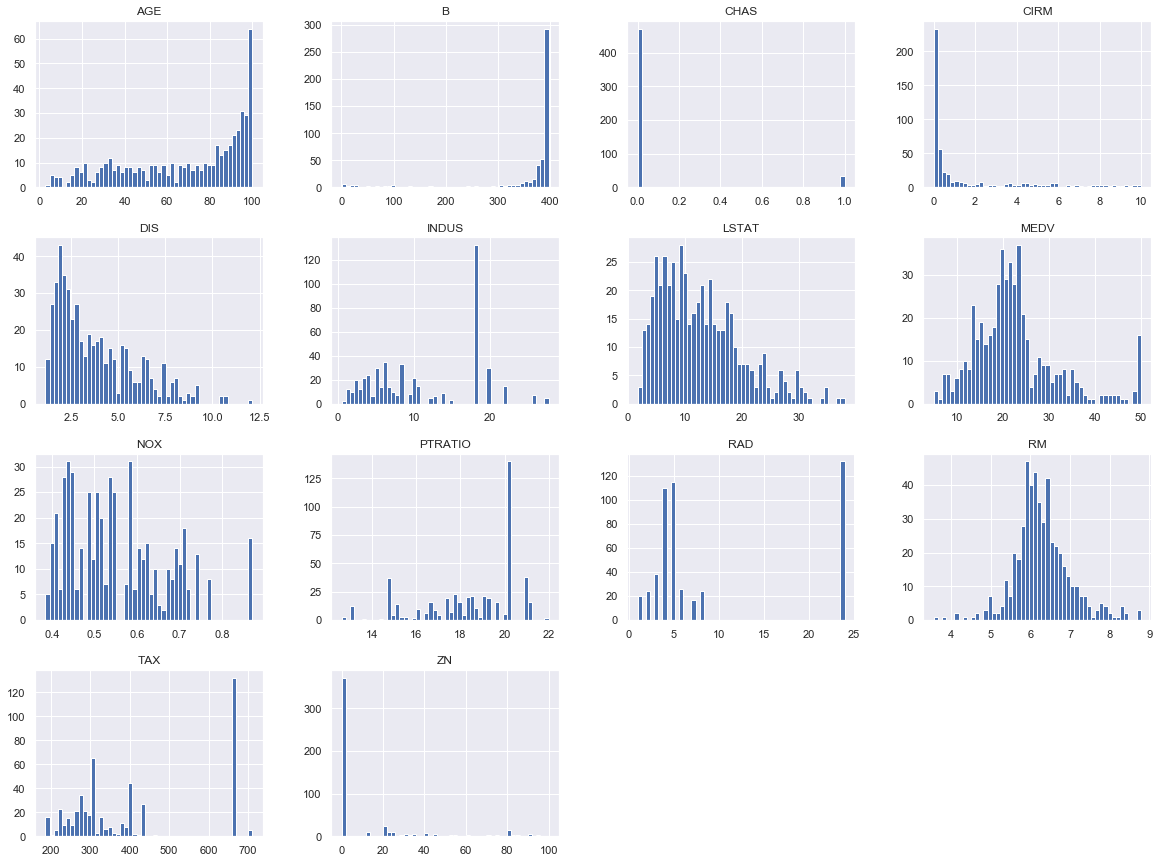

In [19]:
# Visualisation des histogrammes des variables numériques
data.hist(bins=50, figsize=(20,15))
plt.show()

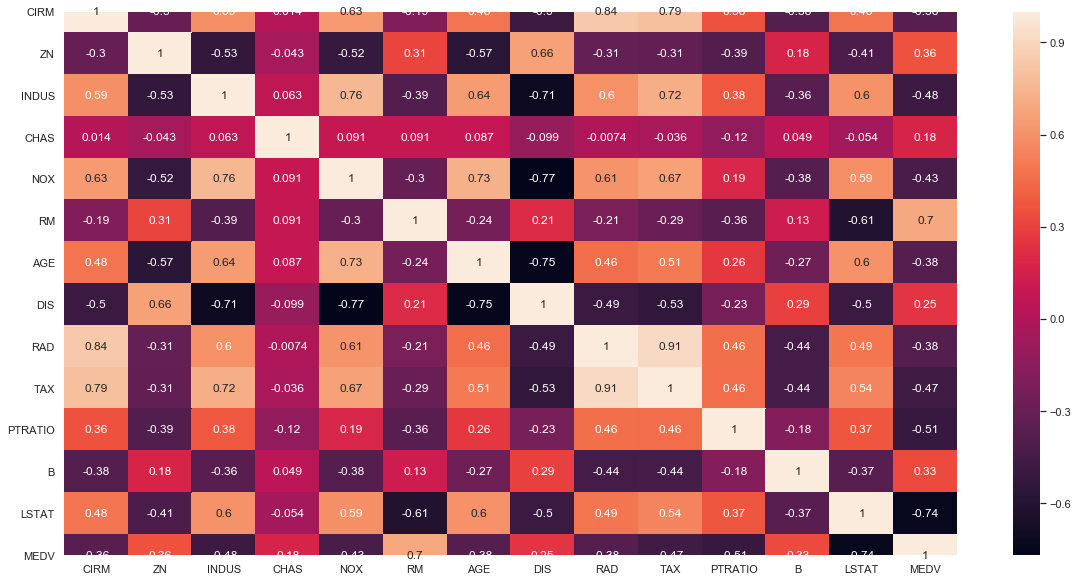

In [20]:
plt.figure(figsize=(20,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
CIRM      -0.362077
AGE       -0.376955
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [22]:
#Correlation with output variable
cor_target = abs(corr_matrix["MEDV"])
relevant_features = cor_target[cor_target>0.5]
relevant_features


RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [23]:
print(data[["LSTAT","PTRATIO"]].corr())
print(data[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [24]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CIRM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 59.3 KB


In [25]:
# Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn :
from sklearn.model_selection import train_test_split

X = data.drop("MEDV", axis=1) # input variables (X est une dataframe)
y = data["MEDV"].to_numpy() # output variable (y est un vecteur)

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2, shuffle=True, random_state=22)

print('X_train:', np.shape(X_train), 'X_test:', np.shape(X_test))

X_train: (404, 13) X_test: (102, 13)



<u><font color="#DC143C" face="Comic sans MS" size="5">LinearRegression</font></u>


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

#Création d'une instance (le modèle lin_reg) par le constructeur LinearRegression() 
lin_reg = LinearRegression()
# Apprentissage du modèle par la méthode fit() : Il s'agit d'une approche d'apprentissage
# supervisée puisqu'on utilise lin_reg.fit(X_train, y_train)
lin_reg.fit(X_train, y_train)

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur les données de test X_test par la méthode .predict()
y_pred = lin_reg.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)


Training: R2= 0.7266645457122266  et RMSE= 4.772705412282072
Testing: R2= 0.7478304991647647  et RMSE= 4.728558105428254



<u><font color="#DC143C" face="Comic sans MS" size="5">HistGradientBoostingRegressor</font></u>


In [34]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 
# Création d'une instance par le constructeur RandomForestRegressor()
sk_reg = HistGradientBoostingRegressor(max_iter=800)
# Apprentissage du modèle rf_reg par la méthode fit()
sk_reg.fit(X_train, y_train)
#Prédiction sur X_train par la méthode predict()
y_pred = sk_reg.predict(X_train)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = sk_reg.predict(X_test)
#Evaluation e calculant R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 0.9997972527031844  et RMSE= 0.12998528224874276
Testing: R2= 0.7865251976742644  et RMSE= 4.350666169387339


<u><font color="#DC143C" face="Comic sans MS" size="5">DecisionTreeRegressor</font></u>



In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score 
# Création d'une instance dt_reg par le constructeur DecisionTreeRegressor()
dt_reg = DecisionTreeRegressor()
# Apprentissage du modèle dt_reg par fit
dt_reg.fit(X_train, y_train)

#Pédiction sur X_train par la méthode predict()
y_pred = dt_reg.predict(X_train)
#Evaluation en calculant les métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("Training: R2=", r2, " et RMSE=", rmse)

#Prédiction sur X_test par la méthode predict()
y_pred = dt_reg.predict(X_test)
#Evaluation en calculant les métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Testing: R2=", r2, " et RMSE=", rmse)

Training: R2= 1.0  et RMSE= 0.0
Testing: R2= 0.8022444286033915  et RMSE= 4.187422811697139


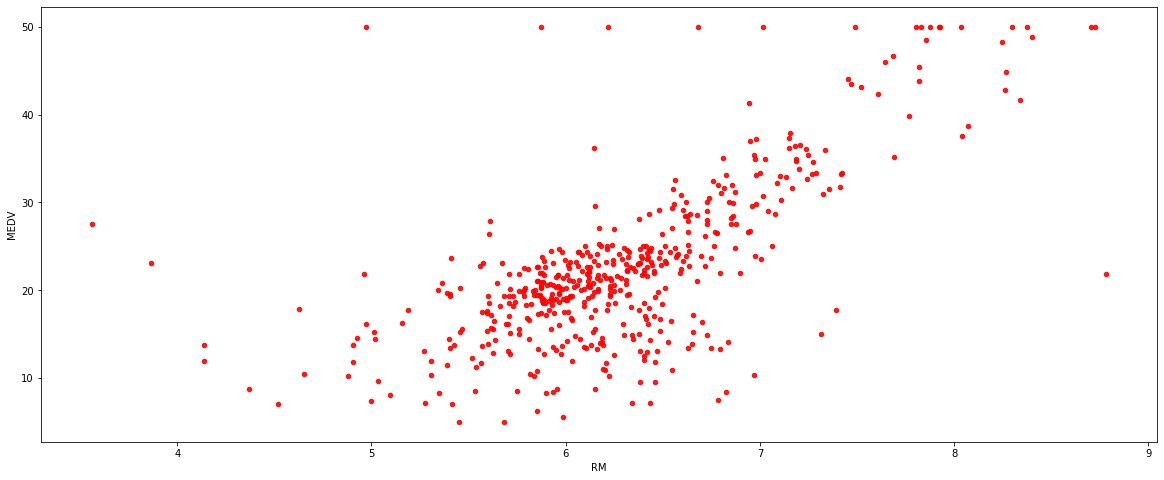

In [42]:
data.plot(kind='scatter', x='RM', y='MEDV', figsize=(20,8), alpha=0.9,color='RED')

plt.show()


<font color="#FA8072" face="Edwardian Script ITC" size="25"> Exercice1</font>


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [50]:
School  = pd.read_csv('grav.csv')
# Affichage de la taille du dataset (n_lignes and n_colonnes)
print("housing's shape : ", School .shape)
# Affichage des 10 premières lignes
School .head()

housing's shape :  (7, 2)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [52]:
#selection de la première colonne de notre dataset (la taille de la population)
X = School .iloc[0:len(School ),0]
#selection de deuxième colonnes de notre dataset (le profit effectué)
Y = School .iloc[0:len(School ),1] 

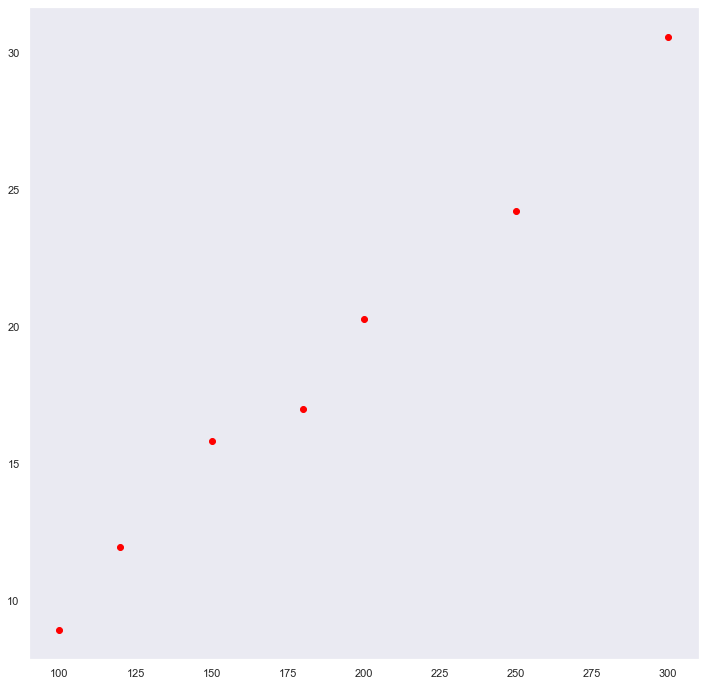

In [57]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y,color='red') # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

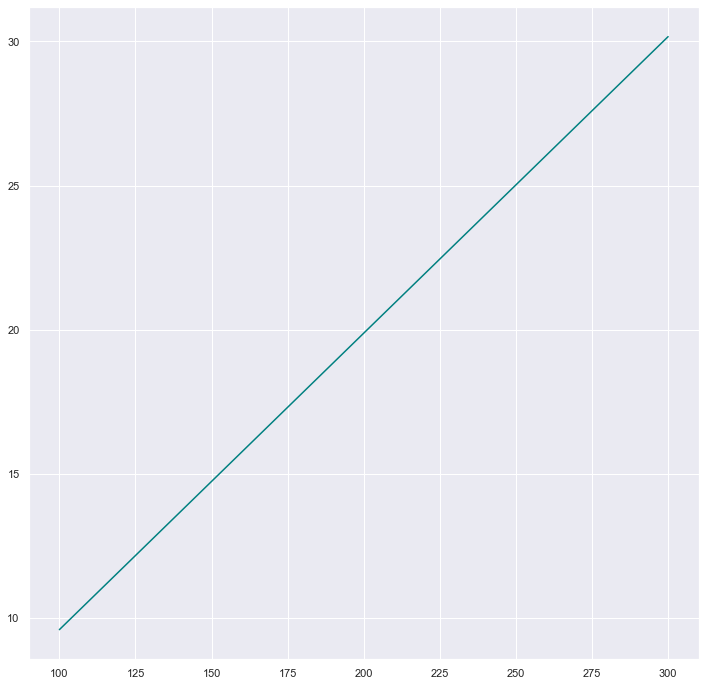

In [56]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
def predict(x):
   return slope * x + intercept
#la variable fitLine sera un tableau de valeurs prédites depuis la tableau de variables X
fitLine = predict(X)
plt.plot(X, fitLine, c='teal')

<font color="#0000FF" face="Edwardian Script ITC" size="25"> Réalisé par:Boulares Nourhéne 3DNI1</font>